Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4908 - loss: 1.0113 - val_accuracy: 0.6806 - val_loss: 0.8597
Epoch 2/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7224 - loss: 0.7792 - val_accuracy: 0.7597 - val_loss: 0.6154
Epoch 3/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7671 - loss: 0.5702 - val_accuracy: 0.8031 - val_loss: 0.5112
Epoch 4/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8209 - loss: 0.4801 - val_accuracy: 0.8202 - val_loss: 0.4604
Epoch 5/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8332 - loss: 0.4578 - val_accuracy: 0.8481 - val_loss: 0.4283
Epoch 6/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8561 - loss: 0.4150 - val_accuracy: 0.8512 - val_loss: 0.4051
Epoch 7/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8604 - loss: 0.3989 - val_accuracy: 0.8574 - val_loss: 0.3886
Epoch 8/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8737 - loss: 0.3829 - val_accuracy: 0.8636 - val_loss: 0.3732
Epo

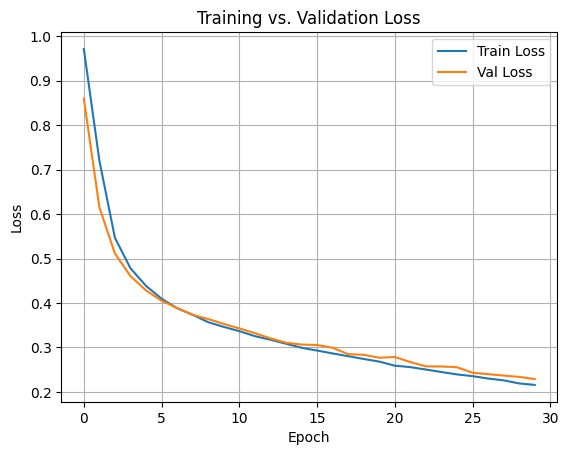

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 Accuracy: 90.85271317829458 %

Classification Report:
               precision    recall  f1-score   support

   excellent       0.92      1.00      0.96       210
        good       0.86      0.96      0.91       210
        poor       0.96      0.77      0.86       225

    accuracy                           0.91       645
   macro avg       0.91      0.91      0.91       645
weighted avg       0.91      0.91      0.91       645



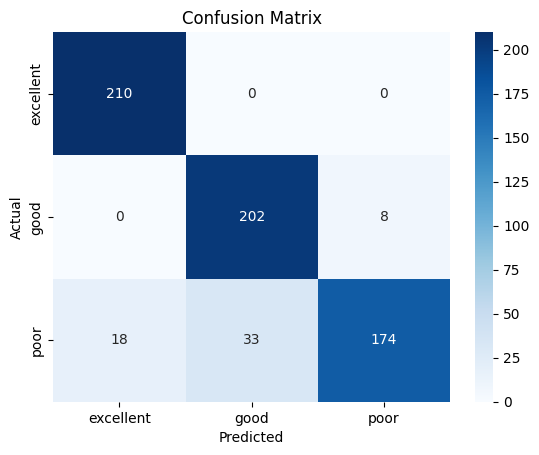

In [9]:
!pip install -q seaborn

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("cleaned_scaled_dataset.csv")
data = shuffle(data, random_state=42).reset_index(drop=True)

# Split features/labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train/Validation/Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Build improved model (simplified + dropout + regularization)
model = Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1],)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop],
                    verbose=1)

# Plot training vs validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate on test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print results
print("\n Accuracy:", accuracy_score(y_test, y_pred) * 100, "%\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["excellent", "good", "poor"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["excellent", "good", "poor"], yticklabels=["excellent", "good", "poor"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
